In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score

In [3]:
assessments = pd.read_csv('./data/oulad/assessments.csv')
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
code_module          206 non-null object
code_presentation    206 non-null object
id_assessment        206 non-null int64
assessment_type      206 non-null object
date                 206 non-null object
weight               206 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.7+ KB


In [4]:
courses = pd.read_csv('./data/oulad/courses.csv')
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
code_module                   22 non-null object
code_presentation             22 non-null object
module_presentation_length    22 non-null int64
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


In [5]:
student_assessment = pd.read_csv('./data/oulad/studentAssessment.csv')
student_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
id_assessment     173912 non-null int64
id_student        173912 non-null int64
date_submitted    173912 non-null int64
is_banked         173912 non-null int64
score             173912 non-null object
dtypes: int64(4), object(1)
memory usage: 6.6+ MB


In [6]:
student_info = pd.read_csv('./data/oulad/studentInfo.csv')
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                32593 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [7]:
student_regs = pd.read_csv('./data/oulad/studentRegistration.csv')
student_regs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
code_module            32593 non-null object
code_presentation      32593 non-null object
id_student             32593 non-null int64
date_registration      32593 non-null object
date_unregistration    32593 non-null object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Text xticklabel objects>)

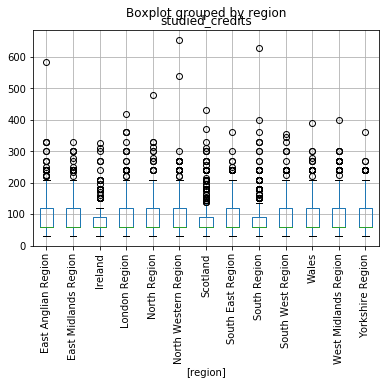

In [8]:
student_info.drop(['id_student', 'num_of_prev_attempts'], axis=1).boxplot(by = 'region')
plt.xticks(rotation = 90)

In [9]:
student_info.id_student.nunique()

28785

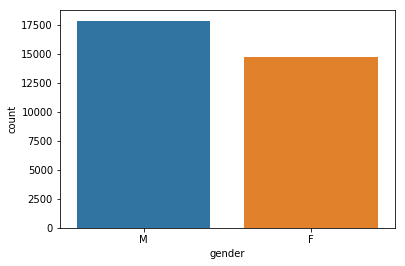

In [10]:
sns.countplot(student_info.gender)

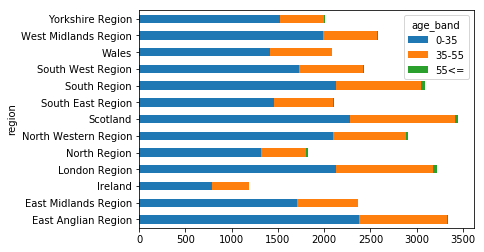

In [138]:
pd.crosstab(student_info.region, student_info.age_band).plot.barh(stacked = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

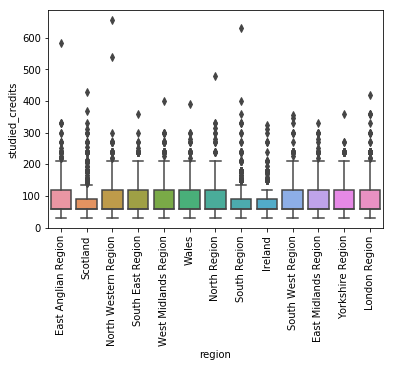

In [11]:
sns.boxplot(x = 'region', y = 'studied_credits', data=student_info)
plt.xticks(rotation = 90)

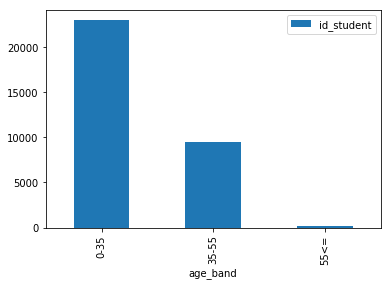

In [12]:
student_info[['id_student', 'age_band']].groupby(by='age_band').count().plot.bar()

## Data Engineering

In [13]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                32593 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [14]:
student_performance = student_info[['id_student', 'num_of_prev_attempts', 'studied_credits']].groupby('id_student').median()
student_performance = student_performance.reset_index()
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 3 columns):
id_student              28785 non-null int64
num_of_prev_attempts    28785 non-null float64
studied_credits         28785 non-null float64
dtypes: float64(2), int64(1)
memory usage: 674.7 KB


In [15]:
student_profile = student_info[['id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band']].drop_duplicates()
student_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28857 entries, 0 to 32592
Data columns (total 6 columns):
id_student           28857 non-null int64
gender               28857 non-null object
region               28857 non-null object
highest_education    28857 non-null object
imd_band             28857 non-null object
age_band             28857 non-null object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


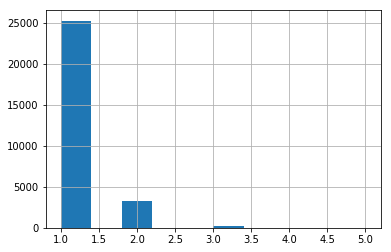

In [16]:
student_ages = student_info[['id_student', 'age_band']].groupby(['id_student']).count()
student_ages = student_ages.reset_index()
student_ages.age_band.hist()

In [17]:
student_module_lengths = student_info.merge(courses, on = ['code_module', 'code_presentation'], how='left')
student_module_lengths = student_module_lengths[['id_student', 
                        'module_presentation_length']].groupby('id_student').median()
student_module_lengths = student_module_lengths.reset_index()
student_module_lengths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 2 columns):
id_student                    28785 non-null int64
module_presentation_length    28785 non-null float64
dtypes: float64(1), int64(1)
memory usage: 449.8 KB


In [18]:
student_regs['unregistered'] = np.where(student_regs.date_unregistration=='?', 0, 1)
student_regs['registered'] = np.where(student_regs.date_unregistration=='?', 0, 1)

In [19]:
student_interest = student_regs[['id_student', 'registered', 'unregistered']].groupby(['id_student']).sum()
student_interest = student_interest.reset_index()
student_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 3 columns):
id_student      28785 non-null int64
registered      28785 non-null int32
unregistered    28785 non-null int32
dtypes: int32(2), int64(1)
memory usage: 449.8 KB


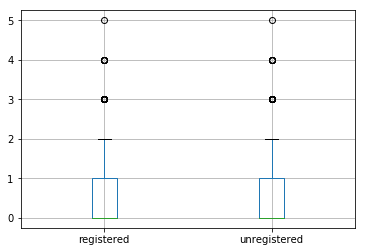

In [20]:
student_interest[['registered', 'unregistered']].boxplot()

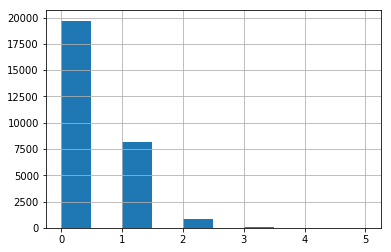

In [21]:
student_interest.unregistered.hist()

In [22]:
student_regs['register_days'] = (np.where(student_regs.date_registration=='?', 0, 
                                          student_regs.date_registration)).astype(int)
student_regs['unregister_days'] = (np.where(student_regs.date_unregistration=='?', 0, 
                                            student_regs.date_unregistration)).astype(int)

In [23]:
student_reg_days = student_regs[['id_student', 'register_days', 
                                   'unregister_days']].groupby(['id_student']).mean()
student_reg_days = student_reg_days.reset_index()
student_reg_days.head()

id_student  register_days  unregister_days
0        3733          -68.0             -8.0
1        6516          -52.0              0.0
2        8462          -87.5             68.5
3       11391         -159.0              0.0
4       23629          -47.0              0.0

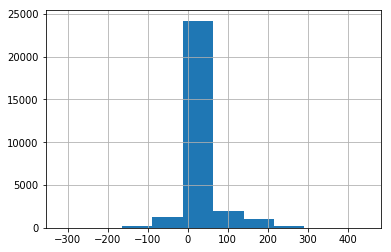

In [24]:
student_reg_days.unregister_days.hist()

In [25]:
student_assessment['score'] = (np.where(student_assessment.score=='?', 0, student_assessment.score)).astype(int)

In [26]:
student_assessment['assessment_mean'] = student_assessment['score'].groupby(student_assessment['id_assessment']) \
.transform('mean')

In [27]:
student_assessment['score_std'] = student_assessment.score/student_assessment.assessment_mean

In [28]:
student_scoring = student_assessment[['id_student', 
                                          'score_std']].groupby(['id_student']).median()
student_scoring = student_scoring.reset_index()
student_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23369 entries, 0 to 23368
Data columns (total 2 columns):
id_student    23369 non-null int64
score_std     23369 non-null float64
dtypes: float64(1), int64(1)
memory usage: 365.2 KB


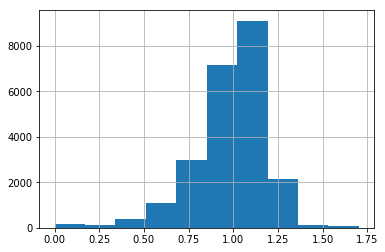

In [29]:
student_scoring.score_std.hist()

In [30]:
vle = pd.read_csv('./data/oulad/vle.csv')
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
id_site              6364 non-null int64
code_module          6364 non-null object
code_presentation    6364 non-null object
activity_type        6364 non-null object
week_from            6364 non-null object
week_to              6364 non-null object
dtypes: int64(1), object(5)
memory usage: 298.4+ KB


In [31]:
student_vle = pd.read_csv('./data/oulad/studentVle.csv')
student_vle = student_vle.merge(vle, on = 'id_site', how = 'left')
student_vle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10655280 entries, 0 to 10655279
Data columns (total 11 columns):
code_module_x          object
code_presentation_x    object
id_student             int64
id_site                int64
date                   int64
sum_click              int64
code_module_y          object
code_presentation_y    object
activity_type          object
week_from              object
week_to                object
dtypes: int64(4), object(7)
memory usage: 975.5+ MB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

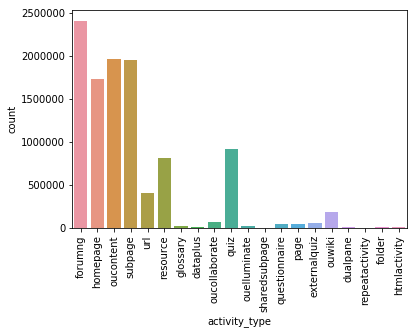

In [32]:
sns.countplot(student_vle.activity_type)
plt.xticks(rotation = 90)

In [33]:
student_interactivity = student_vle[['id_student', 
                                     'activity_type', 'sum_click']].groupby(['id_student', 'activity_type']).mean()
student_interactivity = student_interactivity.reset_index()
student_interactivity.head()

id_student activity_type  sum_click
0        6516      dataplus   5.250000
1        6516       forumng   2.577143
2        6516      homepage   3.145570
3        6516     oucontent   8.179348
4        6516      resource   1.631579

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 21 columns):
id_student        26074 non-null int64
dataplus          26074 non-null float64
dualpane          26074 non-null float64
externalquiz      26074 non-null float64
folder            26074 non-null float64
forumng           26074 non-null float64
glossary          26074 non-null float64
homepage          26074 non-null float64
htmlactivity      26074 non-null float64
oucollaborate     26074 non-null float64
oucontent         26074 non-null float64
ouelluminate      26074 non-null float64
ouwiki            26074 non-null float64
page              26074 non-null float64
questionnaire     26074 non-null float64
quiz              26074 non-null float64
repeatactivity    26074 non-null float64
resource          26074 non-null float64
sharedsubpage     26074 non-null float64
subpage           26074 non-null float64
url               26074 non-null float64
dtypes: float64(20), int64(1)
me

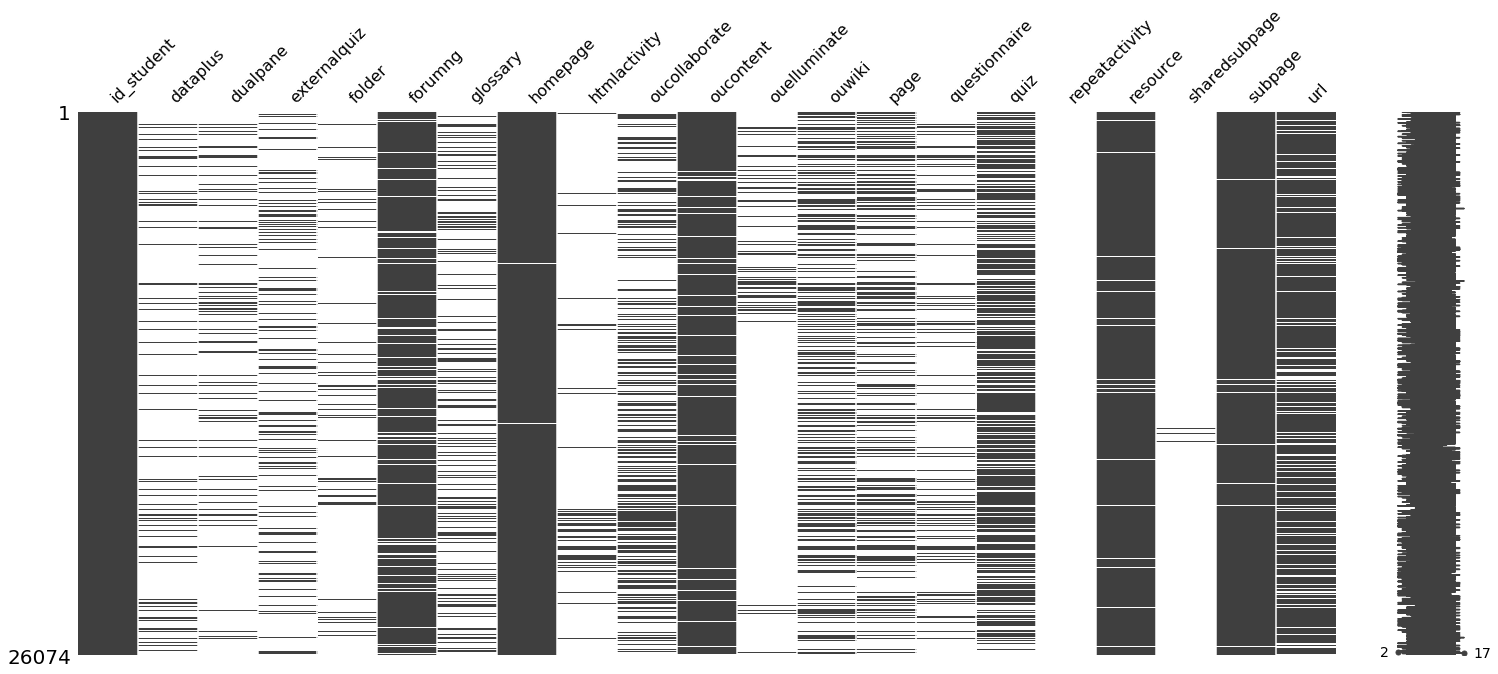

In [34]:
student_interactivity = student_interactivity.pivot(index='id_student', 
                                                    columns='activity_type', values='sum_click')
student_interactivity = student_interactivity.reset_index()
msno.matrix(student_interactivity)
student_interactivity = student_interactivity.fillna(0)
student_interactivity.info()

In [35]:
student_interactivity = student_interactivity[['id_student', 'forumng', 'homepage', 'oucollaborate',
       'oucontent', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'resource', 'subpage', 'url']]

In [36]:
dataset = student_performance.merge(student_module_lengths, 
                                    on = 'id_student', how='left')
dataset = dataset.merge(student_interest, 
                                    on = 'id_student', how='left')
dataset = dataset.merge(student_reg_days[['id_student', 'register_days']], 
                                    on = 'id_student', how='left')
dataset = dataset.merge(student_scoring, 
                                    on = 'id_student', how='left')
dataset = dataset.merge(student_interactivity, 
                                    on = 'id_student', how='left')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28785 entries, 0 to 28784
Data columns (total 19 columns):
id_student                    28785 non-null int64
num_of_prev_attempts          28785 non-null float64
studied_credits               28785 non-null float64
module_presentation_length    28785 non-null float64
registered                    28785 non-null int32
unregistered                  28785 non-null int32
register_days                 28785 non-null float64
score_std                     23369 non-null float64
forumng                       26074 non-null float64
homepage                      26074 non-null float64
oucollaborate                 26074 non-null float64
oucontent                     26074 non-null float64
ouwiki                        26074 non-null float64
page                          26074 non-null float64
questionnaire                 26074 non-null float64
quiz                          26074 non-null float64
resource                      26074 non-null floa

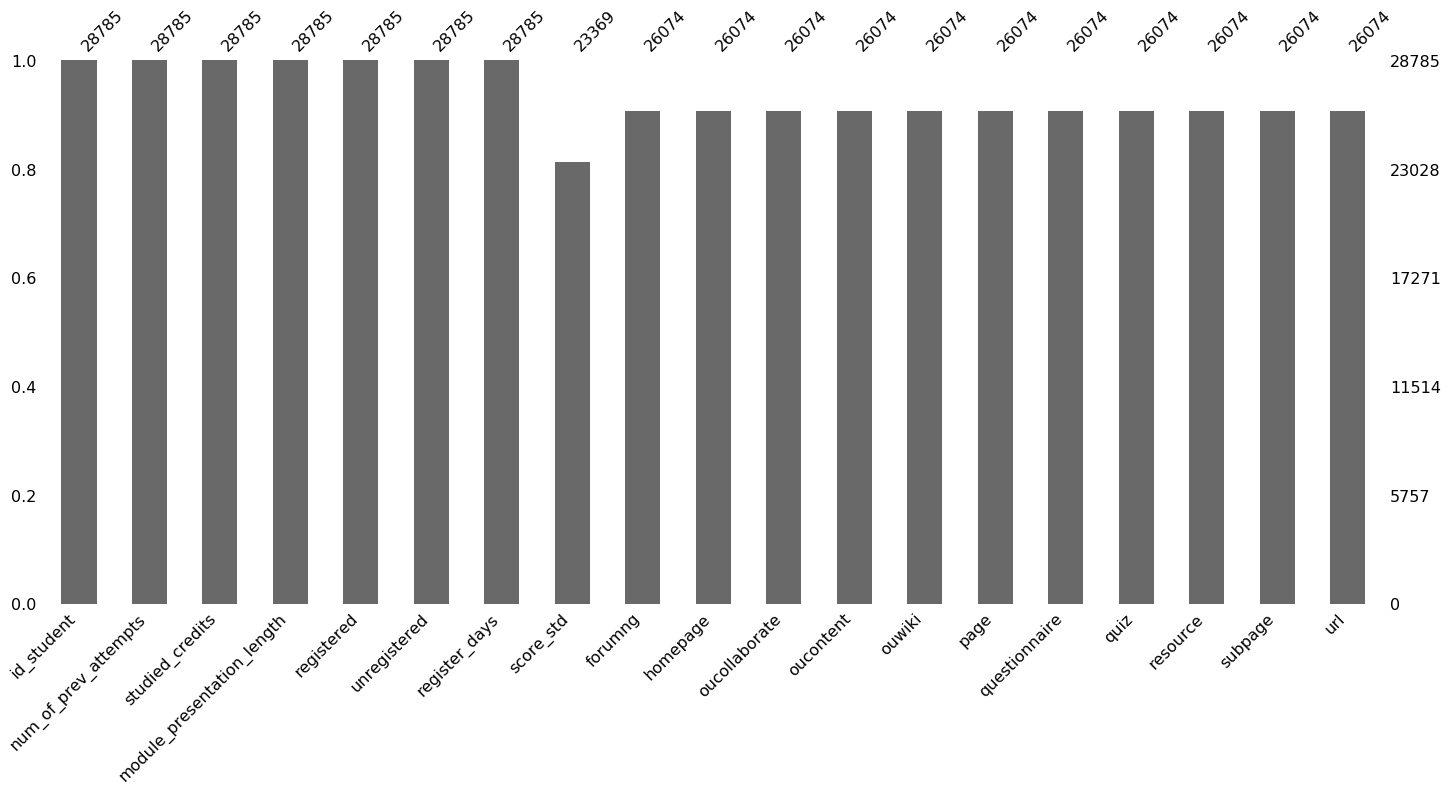

In [37]:
msno.bar(dataset)
dataset = dataset.fillna(0)

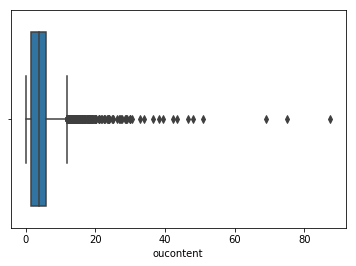

In [38]:
sns.boxplot(dataset.oucontent)

In [39]:
def clip(series):
    bp = plt.boxplot(series)
    clips = [item.get_ydata() for item in bp['caps']]
    return np.clip(series, a_min=clips[0][0], a_max=clips[1][0])

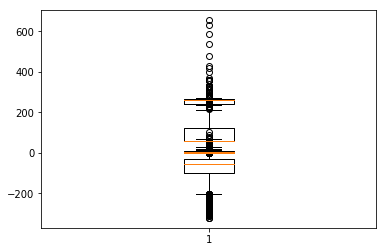

In [40]:
dataset_clip = dataset.drop(columns=['id_student'])
# dataset_clip = dataset_clip.apply(clip, axis=1)
# dataset_clip.info()

dataset_clip['num_of_prev_attempts'] = clip(dataset_clip['num_of_prev_attempts'])
dataset_clip['studied_credits'] = clip(dataset_clip['studied_credits'])
dataset_clip['module_presentation_length'] = clip(dataset_clip['module_presentation_length'])
dataset_clip['registered'] = clip(dataset_clip['registered'])
dataset_clip['unregistered'] = clip(dataset_clip['unregistered'])
dataset_clip['register_days'] = clip(dataset_clip['register_days'])
dataset_clip['score_std'] = clip(dataset_clip['score_std'])
dataset_clip['forumng'] = clip(dataset_clip['forumng'])
dataset_clip['homepage'] = clip(dataset_clip['homepage'])
dataset_clip['oucollaborate'] = clip(dataset_clip['oucollaborate'])
dataset_clip['oucontent'] = clip(dataset_clip['oucontent'])
dataset_clip['ouwiki'] = clip(dataset_clip['ouwiki'])
dataset_clip['page'] = clip(dataset_clip['page'])
dataset_clip['questionnaire'] = clip(dataset_clip['questionnaire'])
dataset_clip['quiz'] = clip(dataset_clip['quiz'])
dataset_clip['resource'] = clip(dataset_clip['resource'])
dataset_clip['subpage'] = clip(dataset_clip['subpage'])
dataset_clip['url'] = clip(dataset_clip['url'])

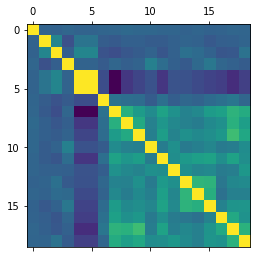

In [41]:
plt.matshow(dataset.corr())

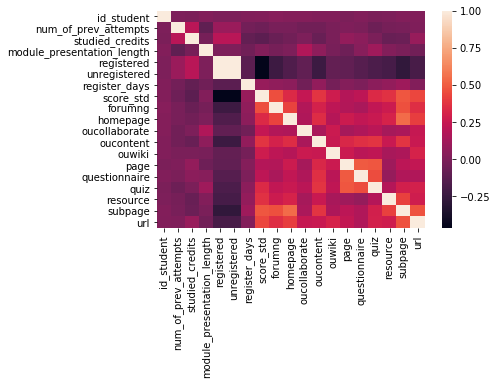

In [42]:
sns.heatmap(dataset.corr())

In [43]:
sc = RobustScaler()

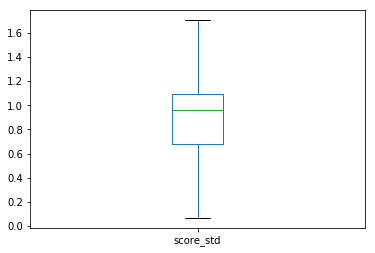

In [44]:
dataset_clip.score_std.plot.box()

In [45]:
data_clust = sc.fit_transform(dataset_clip)
data_clust.shape

(28785, 18)

In [46]:
n_clusters = 20
cluster_goodness = []
for n in range(3, n_clusters):
    kmeans = k_means(X = data_clust, n_clusters = n, random_state = 42)
    cluster_labels = kmeans[1]
    goodness = silhouette_score(X = data_clust, labels = cluster_labels)
    cluster_goodness.append([n, goodness])
    print("K = {0}, Goodness = {1}".format(n, goodness))

cluster_goodness = pd.DataFrame.from_records(data = cluster_goodness,
                                            columns = ["n", "goodness"])
plt.plot(cluster_goodness.goodness)

K = 3, Goodness = 0.17318184243659723
K = 4, Goodness = 0.17365016298056035
K = 5, Goodness = 0.17204706652072002
K = 6, Goodness = 0.1520219639000728
K = 7, Goodness = 0.14686020624250257
K = 8, Goodness = 0.14613748588768366
K = 9, Goodness = 0.14471156190530193
K = 10, Goodness = 0.14262786170714603
K = 11, Goodness = 0.1369248118057971


KeyboardInterrupt: 

In [47]:
kmeans = k_means(X = data_clust, n_clusters = 4, random_state = 42)
kmeans[0]

array([[ 0.        ,  0.32922629, -0.20890487,  0.20632208,  0.20632208,
        -0.18152257,  0.13709692,  0.34669585,  0.46778252,  1.0246105 ,
         0.43204611,  1.45270636,  0.85651386,  0.        ,  0.64303134,
         0.32910812,  0.28802443,  0.15106811],
       [ 0.        ,  0.453437  , -0.235619  ,  0.84501657,  0.84501657,
        -0.36559454, -2.10202548, -1.36413101, -1.58312965,  0.01057864,
        -0.81893958,  0.00288045,  0.029463  ,  0.        , -0.29724085,
        -0.46608166, -0.86969016, -0.77733328],
       [ 0.        ,  0.17478787, -0.2233984 ,  0.10022683,  0.10022683,
        -0.0736763 ,  0.13180177,  0.10978744,  0.02534032,  0.38583513,
         0.01180642,  0.06658237,  0.12359413,  0.        ,  0.12846765,
         0.25426614,  0.17454014, -0.1036405 ],
       [ 0.        ,  0.47626333, -0.2412301 ,  0.98970793,  0.98970793,
        -0.15660693, -1.37666731, -0.1502477 ,  0.46034911,  0.32524216,
        -0.12510075,  0.21011363,  0.29405374,  0.   

In [48]:
kmeans[1].shape

(28785,)

In [49]:
centroids = pd.DataFrame(kmeans[0], columns=dataset_clip.columns)
centroids["cluster"] = centroids.index.tolist()
centroids["cluster"] = centroids["cluster"] + 1
centroids_melt = pd.melt(centroids, id_vars=['cluster'])

In [142]:
centroids_melt

cluster                    variable     value
0         1        num_of_prev_attempts  0.000000
1         2        num_of_prev_attempts  0.000000
2         3        num_of_prev_attempts  0.000000
3         4        num_of_prev_attempts  0.000000
4         1             studied_credits  0.329226
5         2             studied_credits  0.453437
6         3             studied_credits  0.174788
7         4             studied_credits  0.476263
8         1  module_presentation_length -0.208905
9         2  module_presentation_length -0.235619
10        3  module_presentation_length -0.223398
11        4  module_presentation_length -0.241230
12        1                  registered  0.206322
13        2                  registered  0.845017
14        3                  registered  0.100227
15        4                  registered  0.989708
16        1                unregistered  0.206322
17        2                unregistered  0.845017
18        3                unregistered  0.100227
19        4                unregistered  0.989708
20        1               register_days -0.181523
21        2               register_days -0.365595
22        3               register_days -0.073676
23        4               register_days -0.156607
24        1                   score_std  0.137097
25        2                   score_std -2.102025
26        3                   score_std  0.131802
27        4                   score_std -1.376667
28        1                     forumng  0.346696
29        2                     forumng -1.364131
..      ...                         ...       ...
42        3                   oucontent  0.011806
43        4                   oucontent -0.125101
44        1                      ouwiki  1.452706
45        2                      ouwiki  0.002880
46        3                      ouwiki  0.066582
47        4                      ouwiki  0.210114
48        1                        page  0.856514
49        2                        page  0.029463
50        3                        page  0.123594
51        4                        page  0.294054
52        1               questionnaire  0.000000
53        2               questionnaire  0.000000
54        3               questionnaire  0.000000
55        4               questionnaire  0.000000
56        1                        quiz  0.643031
57        2                        quiz -0.297241
58        3                        quiz  0.128468
59        4                        quiz  0.026692
60        1                    resource  0.329108
61        2                    resource -0.466082
62        3                    resource  0.254266
63        4                    resource  0.190914
64        1                     subpage  0.288024
65        2                     subpage -0.869690
66        3                     subpage  0.174540
67        4                     subpage  0.188130
68        1                         url  0.151068
69        2                         url -0.777333
70        3                         url -0.103640
71        4                         url -0.085123

[72 rows x 3 columns]

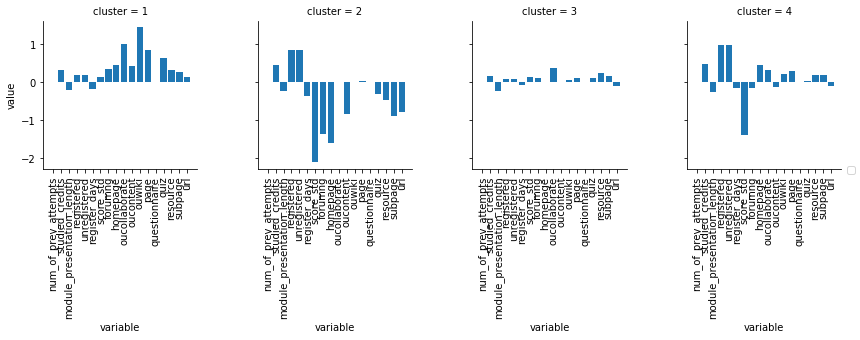

In [50]:
g = sns.FacetGrid(centroids_melt, col="cluster", col_wrap = 4)
g.map(plt.bar, "variable", "value")
g.add_legend()
g.set_xticklabels(rotation=90)

In [163]:
student_details['type'] = 'other'

conditions = [
    (student_details['cluster'] == '1'),
    (student_details['cluster'] == '2'),
    (student_details['cluster'] == '3'),
    (student_details['cluster'] == '4')]
choices = ['performance', 'churn', 'potential', 'assistance']
student_details['type'] = np.select(conditions, choices, default='other')

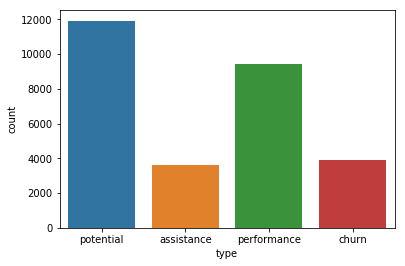

In [164]:
sns.countplot(student_details.type)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

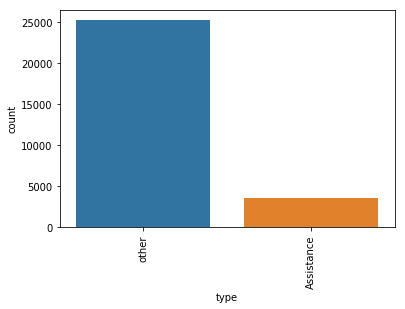

In [155]:
sns.countplot(student_details['type'])
plt.xticks(rotation = 90)

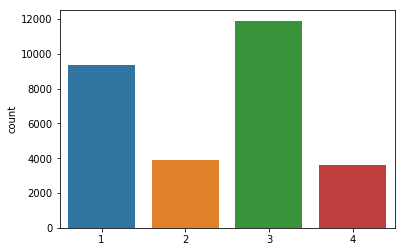

In [51]:
sns.countplot(kmeans[1] + 1)

C:\Users\abjilani\AppData\Local\Continuum\Anaconda3\envs\dlnd-tf-lab\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\abjilani\AppData\Local\Continuum\Anaconda3\envs\dlnd-tf-lab\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\abjilani\AppData\Local\Continuum\Anaconda3\envs\dlnd-tf-lab\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


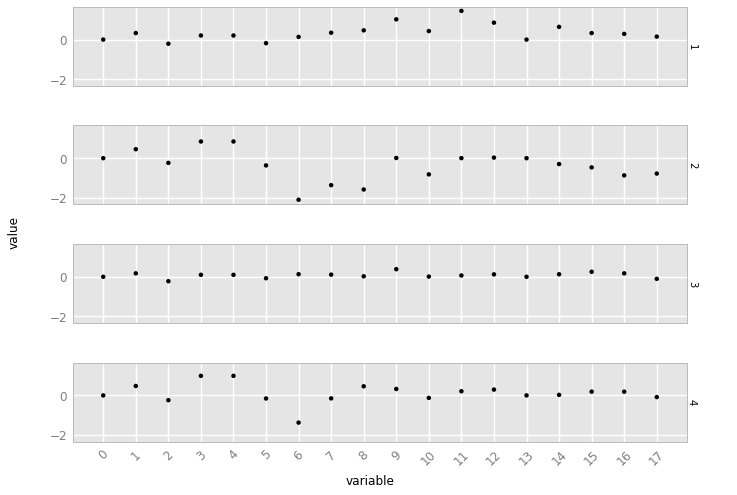

<ggplot: (-9223371887468707829)>

In [52]:
from ggplot import *

ggplot(centroids_melt, aes(x = 'variable', y = 'value')) + geom_point() + facet_grid(x = 'cluster') \
+ theme(axis_text_x  = element_text(angle = 45))

In [53]:
student_cluster = pd.DataFrame({'id_student': dataset.id_student, 'cluster':kmeans[1] + 1})
student_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28785 entries, 0 to 28784
Data columns (total 2 columns):
cluster       28785 non-null int32
id_student    28785 non-null int64
dtypes: int32(1), int64(1)
memory usage: 562.2 KB


In [54]:
student_details = student_profile.merge(student_cluster, on = 'id_student', how = 'left')
student_details.cluster = student_details.cluster.apply(str)
student_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28857 entries, 0 to 28856
Data columns (total 7 columns):
id_student           28857 non-null int64
gender               28857 non-null object
region               28857 non-null object
highest_education    28857 non-null object
imd_band             28857 non-null object
age_band             28857 non-null object
cluster              28857 non-null object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [166]:
student_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28857 entries, 0 to 28856
Data columns (total 8 columns):
id_student           28857 non-null int64
gender               28857 non-null object
region               28857 non-null object
highest_education    28857 non-null object
imd_band             28857 non-null object
age_band             28857 non-null object
cluster              28857 non-null object
type                 28857 non-null object
dtypes: int64(1), object(7)
memory usage: 3.2+ MB


In [76]:
region_count = student_details[['id_student', 'region', 'cluster']].groupby(['region','cluster']).count()
region_count = region_count.reset_index()
region_count.head()

region cluster  id_student
0   East Anglian Region       1         913
1   East Anglian Region       2         423
2   East Anglian Region       3        1334
3   East Anglian Region       4         337
4  East Midlands Region       1         648

## Geo Insights
1. Where to set hiring events? <b>Scotland, South</b>
2. Where to set meetups as online interaction is low? <b>London, North Western Region <b>

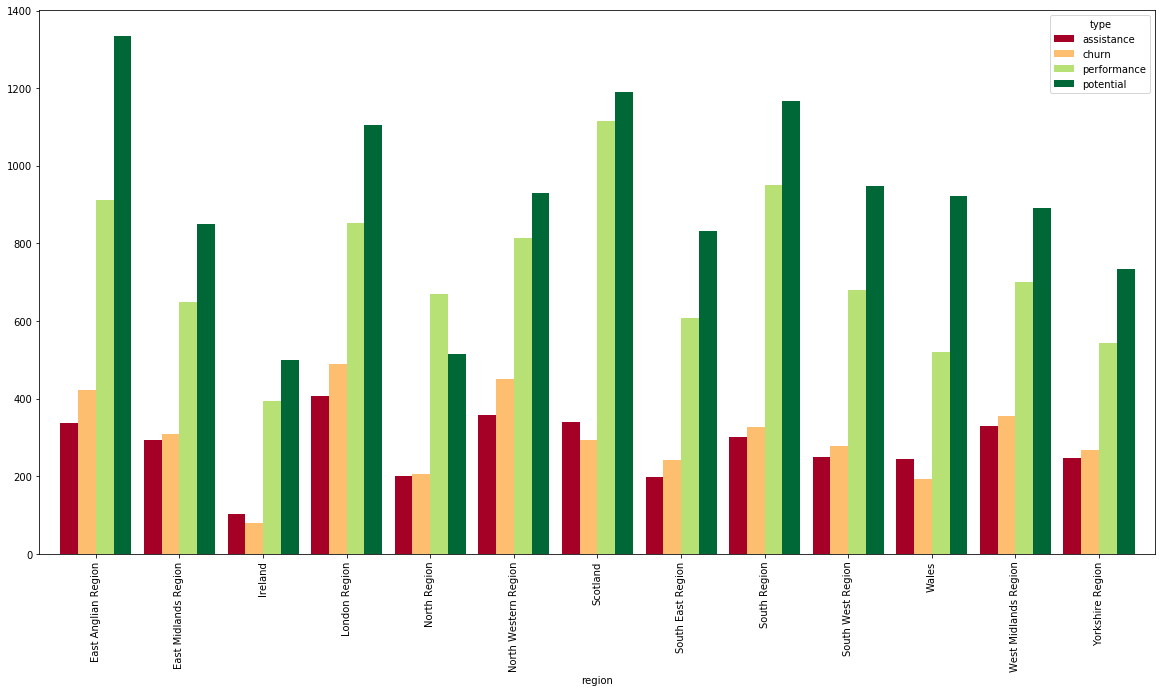

In [194]:
pd.crosstab(student_details.region, student_details.type).plot.bar(width = 0.85, figsize=(20,10), 
                                                                    colormap='RdYlGn')